In [17]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
import numpy as np
from sklearn.model_selection import train_test_split
from utilities import load_face_data
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
faces, labels = load_face_data('face.mat')
face_train, face_test, label_train, label_test = train_test_split(faces, labels, test_size=0.3)

In [24]:
classes = np.unique(label_train)
within_scatter_matrix = np.zeros((face_train.shape[1], face_train.shape[1]))
between_scatter_matrix = np.zeros((face_train.shape[1], face_train.shape[1]))

overall_mean = np.mean(face_train, axis = 0)
for cls in classes:
    class_points = face_train[label_train == cls]
    n = len(class_points)
    
    mean_class = np.mean(class_points, axis = 0)
    
    sub = class_points - mean_class
    mean_d = overall_mean - mean_class
    
    within_scatter_matrix += np.dot(sub.T, sub)
    between_scatter_matrix += n * np.outer(mean_d, mean_d)

In [90]:
# eig_vals, eig_vecs = np.linalg.eig(
#     np.dot(
#         np.linalg.inv(within_scatter_matrix), 
#         between_scatter_matrix
#     )
# )

U, eig_vals, eig_vecs = np.linalg.svd(np.dot(
        np.linalg.inv(within_scatter_matrix), 
        between_scatter_matrix
    ), full_matrices=True) 

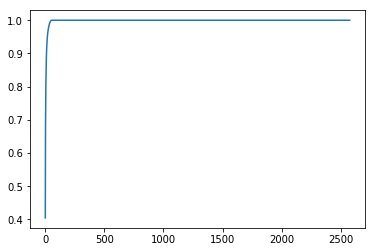

In [91]:
ev = np.abs(eig_vals)
plt.plot(np.arange(len(ev)), np.cumsum(ev) / np.sum(ev))

In [92]:
number_ev = np.sum(np.cumsum(ev) / np.sum(ev) < 0.95) # find number of evals s.t. 95% of total variance is kept
eigenvector_W = eig_vecs[:number_ev]
print(eigenvector_W.shape)

(18, 2576)


In [93]:
projected_training_set = np.dot(face_train, eigenvector_W.T)
projected_test_set = np.dot(face_test, eigenvector_W.T)
print('train dims: {}, test dims: {}'.format(projected_training_set.shape, projected_test_set.shape))

train dims: (364, 18), test dims: (156, 18)


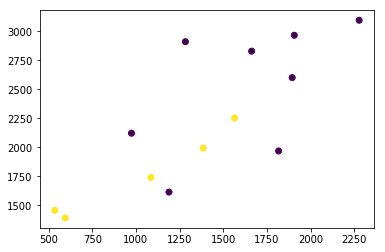

In [94]:
selector = np.logical_or(label_train == 2, label_train == 3)
plt.scatter(projected_training_set[selector, 0], projected_training_set[selector, 1], c = label_train[selector])

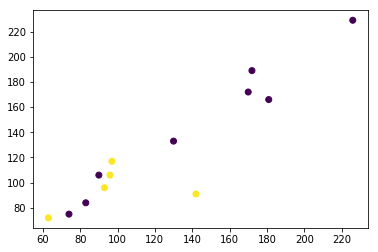

In [95]:
plt.scatter(face_train[selector, 0], face_train[selector, 1], c = label_train[selector])

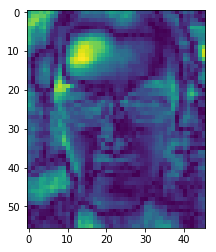

In [103]:
plt.imshow(np.rot90(np.abs(eigenvector_W[3]).reshape(46, -1), k = -1))